In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('results/experiment1_20211209152814.csv')
df.latency = df.latency * 10e-6
df.head()

,system_name,run_id,latency,operation,on_leader,n_nodes,n_clients
0,ordering_after_write_2_nodes_1_client,0,4.215,write,True,2,1
1,ordering_after_write_2_nodes_1_client,0,3.296,write,False,2,1
2,ordering_after_write_2_nodes_1_client,0,2.922,write,False,2,1
3,ordering_after_write_2_nodes_1_client,0,3.100,write,True,2,1
4,ordering_after_write_2_nodes_1_client,0,1.690,read,False,2,1


<AxesSubplot:xlabel='system_name', ylabel='latency'>

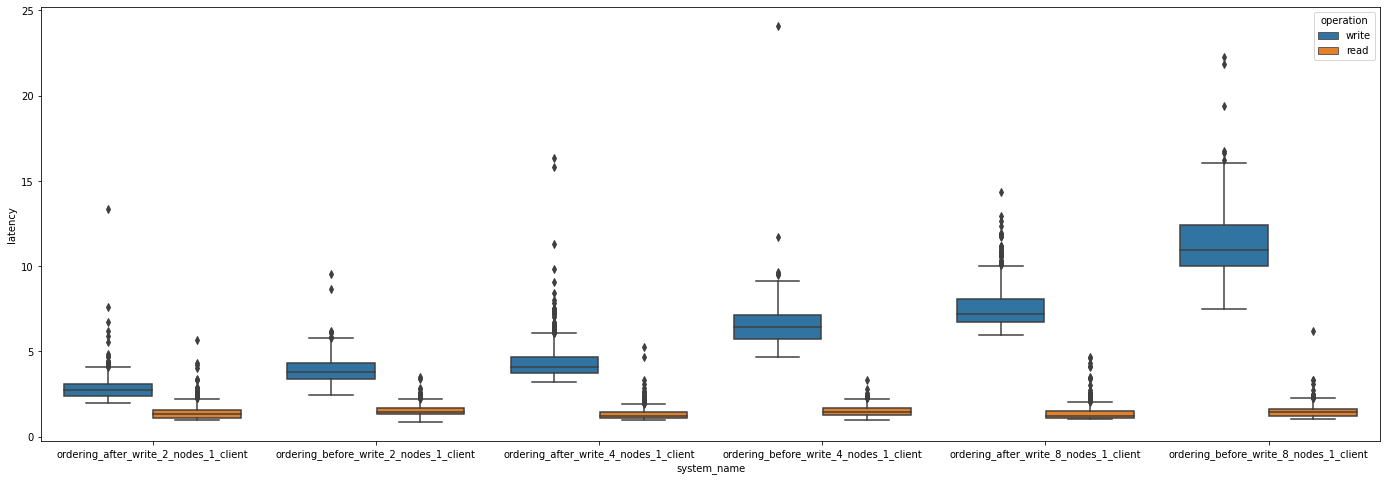

In [21]:
# fig, axs = plt.subplots(1, 2, figsize=(7, 5))

plt.figure(figsize=(24,8))
sns.boxplot(x='system_name', y='latency', hue="operation", data=df)





# for group, sub_df in df.groupby("system_name"):
#     print(group)
#     sub_df.boxplot(by="operation", column="latency", ax=None, grid=True, figsize=(7, 5))
# # axs[0].set(ylabel='latency (ms)')
# # fig.suptitle('Mean Latency Per Operation')

In [ ]:
# fig = ax.get_figure()
fig.savefig('results/figures/order_before_vs_after_write.pdf')